In [3]:
import pandas as pd

df = pd.read_csv("a1_data.csv")

In [5]:
import numpy as np

X = df.values

In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression, LassoLarsIC

def sortnregress(X):
    LR = LinearRegression()
    LL = LassoLarsIC(criterion='bic')

    d = X.shape[1]
    W = np.zeros((d, d))
    increasing = np.argsort(np.var(X, axis=0))
    print(increasing)
    for k in range(1, d):
        covariates = increasing[:k]
        target = increasing[k]
        LR.fit(X[:, covariates], X[:, target].ravel())
        weight = np.abs(LR.coef_)
        LL.fit(X[:, covariates] * weight, X[:, target].ravel())
        W[covariates, target] = LL.coef_ * weight
    return W


In [18]:
W

array([[ 0.        ,  0.        ,  0.19273552,  0.        ,  0.        ,
         0.        , -0.19065004,  0.08140949, -0.07473021, -0.44325614,
        -0.17540288],
       [ 0.78354559,  0.        , -0.19055202,  0.06223735,  0.        ,
         0.01782567,  0.23276964,  0.        ,  0.13096988,  0.4987106 ,
         0.14662184],
       [ 0.        ,  0.        ,  0.        ,  0.13126887,  0.16155825,
         0.        , -0.06555882,  0.        ,  0.        ,  0.        ,
        -0.03220655],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.03229376,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.24868515,  0.        ,
         0.02357204,  0.        ,  0.        ,  0.        ,  0.03344842,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.22641082,
         0.   

[ 1  0  7  2  8 10  6  4  5  3  9]


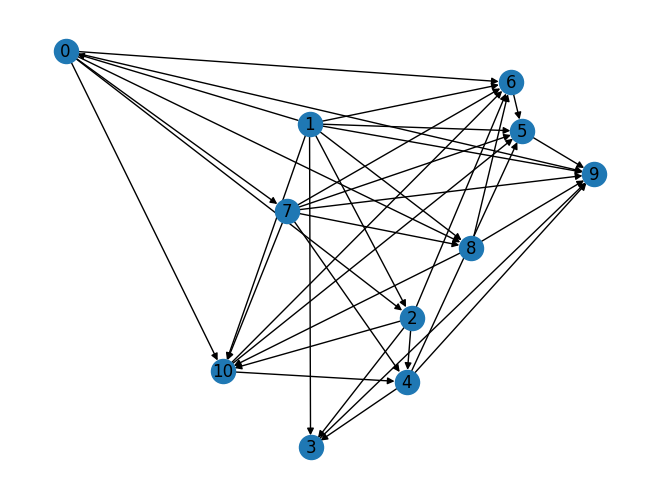

In [17]:
W = sortnregress(X)
# visualize the matrix as a directed graph
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph(W)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression, LassoLarsIC

def sortnregress(X):
    LR = LinearRegression()
    LL = LassoLarsIC(criterion='bic')

    d = X.shape[1]
    W = np.zeros((d, d))
    increasing = np.argsort(np.var(X, axis=0))
    print(increasing)
    for k in range(1, d):
        covariates = increasing[:k]
        target = increasing[k]
        LR.fit(X[:, covariates], X[:, target].ravel())
        weight = np.abs(LR.coef_)
        LL.fit(X[:, covariates] * weight, X[:, target].ravel())
        W[covariates, target] = LL.coef_ * weight
    return W